# Analyzing internet survey

https://forms.gle/MC62PiECwBKWo7Np6

In [349]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [350]:
df = pd.read_csv(' toestemming vragen voor data toegang.csv')
df.head()

,Tijdstempel,Do you own an iOS (Apple) iPhone? Bent u in het bezit van een iOS (Apple) iPhone?,Are you familiar with this type of question? Bent u bekend met dit soort vragen?,How many times do you encounter access questions? Hoe vaak komt u dit soort vragen tegen?,What do you think about the questioning? Wat vindt u van de vraagstelling?,Can you tell from the question which personal data is going to be collected and what it is used for? Kan u uit de vraag opmaken welke gegevens er worden verzameld en waar deze voor gebruikt worden?,Are you rejecting the access sometimes? Weigert u soms toegang tot uw gegevens?,Why are you rejecting the access? Waarom weigert u de toegang?,Does the questioning provide enough information to answer the question? Wordt u voldoende geïnformeerd om de vraag te kunnen beantwoorden?,Are you aware of the consequences your choice has? Bent u zich bewust van de gevolgen die u antwoord heeft?,Which feeling(s) does the question evoke? Welk gevoel roept de vraag bij u op?,The appearance of the question supports my decision. Het uiterlijk van de vraag helpt mij bij het maken van mijn keuzen.,"What would you change on the appearance of the question? (think about: icons, color, buttons, etc.) Wat zou u aan het uiterlijk van de vraag veranderen? (denk aan: icoon, kleur, knop, etc.)",What is your age?,What is your gender?,"Are you interested? Please leave your email address in the ""Anders"" option below. Wilt u mee doen aan het volgende onderzoek? Laat aub uw email adres achter in de ""Anders"" optie."
0,2021/01/11 3:12:15 p.m. CET,Yes,Yes,Every time I open an app / Elke keer als ik ee...,Clear / duidelijk,No,Yes,Vind het niet nodig dat ze mijn informatie geb...,No,No,Annoying / hinderlijk,3,Vind ik moeilijk,20 - 25,Male,Chiem-stam@hotmail.com
1,2021/01/11 3:25:52 p.m. CET,Yes,Yes,Every time I download an app / Elke keer als i...,Unclear/ onduidelijk,No,Yes,Privé gegevens en doel van de app,No,No,Irritation / Irritatie;Doubt / Twijfel,3,Meer highlights,20 - 25,Female,I'm not interested
2,2021/01/11 3:27:17 p.m. CET,Yes,Yes,Every time I download an app / Elke keer als i...,Clear / duidelijk,Yes,Yes,Omdat ik die toegang niet wil verlenen,Yes,Yes,Neutral,3,Weiger in rood //oké in groen,55 - 60,Female,I'm not interested
3,2021/01/11 6:38:41 p.m. CET,Yes,Yes,Af en toe,Clear / duidelijk,No,Yes,Vertrouwenskwestie,De uitleg vind ik te beknopt.,Yes,Doubt / Twijfel,4,Kleur en button,50 - 55,Female,I'm not interested
4,2021/01/11 7:16:35 p.m. CET,Yes,Yes,Every time I download an app / Elke keer als i...,Clear / duidelijk,No,Yes,"It was a accident that I say ""yes""",No,Yes,Irritation / Irritatie;Annoying / hinderlijk,2,dont know,20 - 25,Female,NaN


In [351]:
df1 = df.replace({'De uitleg vind ik te beknopt. ': 0})

In [352]:
df1['What is your gender?'].value_counts()

Female    19
Male       7
Name: What is your gender?, dtype: int64

In [353]:
df1 = pd.get_dummies(df1, columns=['What do you think about the questioning? Wat vindt u van de vraagstelling?'])
df1.head()

,Tijdstempel,Do you own an iOS (Apple) iPhone? Bent u in het bezit van een iOS (Apple) iPhone?,Are you familiar with this type of question? Bent u bekend met dit soort vragen?,How many times do you encounter access questions? Hoe vaak komt u dit soort vragen tegen?,Can you tell from the question which personal data is going to be collected and what it is used for? Kan u uit de vraag opmaken welke gegevens er worden verzameld en waar deze voor gebruikt worden?,Are you rejecting the access sometimes? Weigert u soms toegang tot uw gegevens?,Why are you rejecting the access? Waarom weigert u de toegang?,Does the questioning provide enough information to answer the question? Wordt u voldoende geïnformeerd om de vraag te kunnen beantwoorden?,Are you aware of the consequences your choice has? Bent u zich bewust van de gevolgen die u antwoord heeft?,Which feeling(s) does the question evoke? Welk gevoel roept de vraag bij u op?,The appearance of the question supports my decision. Het uiterlijk van de vraag helpt mij bij het maken van mijn keuzen.,"What would you change on the appearance of the question? (think about: icons, color, buttons, etc.) Wat zou u aan het uiterlijk van de vraag veranderen? (denk aan: icoon, kleur, knop, etc.)",What is your age?,What is your gender?,"Are you interested? Please leave your email address in the ""Anders"" option below. Wilt u mee doen aan het volgende onderzoek? Laat aub uw email adres achter in de ""Anders"" optie.",What do you think about the questioning? Wat vindt u van de vraagstelling?_Clear / duidelijk,What do you think about the questioning? Wat vindt u van de vraagstelling?_Unclear/ onduidelijk
0,2021/01/11 3:12:15 p.m. CET,Yes,Yes,Every time I open an app / Elke keer als ik ee...,No,Yes,Vind het niet nodig dat ze mijn informatie geb...,No,No,Annoying / hinderlijk,3,Vind ik moeilijk,20 - 25,Male,Chiem-stam@hotmail.com,1,0
1,2021/01/11 3:25:52 p.m. CET,Yes,Yes,Every time I download an app / Elke keer als i...,No,Yes,Privé gegevens en doel van de app,No,No,Irritation / Irritatie;Doubt / Twijfel,3,Meer highlights,20 - 25,Female,I'm not interested,0,1
2,2021/01/11 3:27:17 p.m. CET,Yes,Yes,Every time I download an app / Elke keer als i...,Yes,Yes,Omdat ik die toegang niet wil verlenen,Yes,Yes,Neutral,3,Weiger in rood //oké in groen,55 - 60,Female,I'm not interested,1,0
3,2021/01/11 6:38:41 p.m. CET,Yes,Yes,Af en toe,No,Yes,Vertrouwenskwestie,0,Yes,Doubt / Twijfel,4,Kleur en button,50 - 55,Female,I'm not interested,1,0
4,2021/01/11 7:16:35 p.m. CET,Yes,Yes,Every time I download an app / Elke keer als i...,No,Yes,"It was a accident that I say ""yes""",No,Yes,Irritation / Irritatie;Annoying / hinderlijk,2,dont know,20 - 25,Female,NaN,1,0


In [354]:
df1 = df1.replace(['Yes'],1)
df1 = df1.replace(['No'],0)

In [355]:
def data_literacy(df1):
    if (df1['What do you think about the questioning? Wat vindt u van de vraagstelling?_Clear / duidelijk']== 1) and (df1['Does the questioning provide enough information to answer the question? Wordt u voldoende geïnformeerd om de vraag te kunnen beantwoorden?']== 0):
        return 1
    else:
        return 0

df1['question-percievement_data-literacy'] = df1.apply(data_literacy, axis=1)

In [356]:
df1['question-percievement_data-literacy'].value_counts()

0    19
1     7
Name: question-percievement_data-literacy, dtype: int64

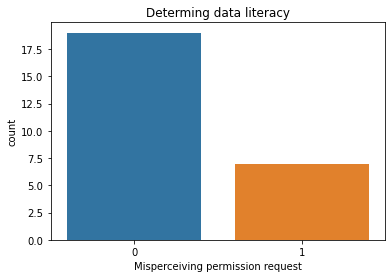

In [357]:
sns.countplot(x='question-percievement_data-literacy', data=df1)
plt.title('Determing data literacy')
plt.xlabel('Misperceiving permission request')
plt.show()

In [358]:
def question_context(df1):
    if (df1['What do you think about the questioning? Wat vindt u van de vraagstelling?_Clear / duidelijk']== 1) and (df1['Can you tell from the question which personal data is going to be collected and what it is used for? Kan u uit de vraag opmaken welke gegevens er worden verzameld en waar deze voor gebruikt worden?']== 0):
        return 1
    else:
        return 0

df1['question-percievement_context'] = df1.apply(question_context, axis=1)

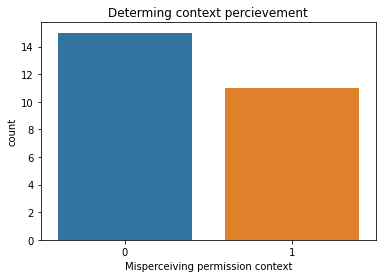

In [359]:
sns.countplot(x='question-percievement_context', data=df1)
plt.title('Determing context percievement')
plt.xlabel('Misperceiving permission context')
plt.show()

In [360]:
df1['question-percievement_context'].value_counts()

0    15
1    11
Name: question-percievement_context, dtype: int64

In [361]:
df1['Are you aware of the consequences your choice has? Bent u zich bewust van de gevolgen die u antwoord heeft? '].value_counts()

0    15
1    11
Name: Are you aware of the consequences your choice has? Bent u zich bewust van de gevolgen die u antwoord heeft? , dtype: int64

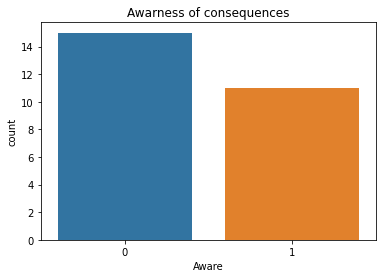

In [362]:
sns.countplot(x='Are you aware of the consequences your choice has? Bent u zich bewust van de gevolgen die u antwoord heeft? ', data=df1)
plt.title('Awarness of consequences')
plt.xlabel('Aware')
plt.show()

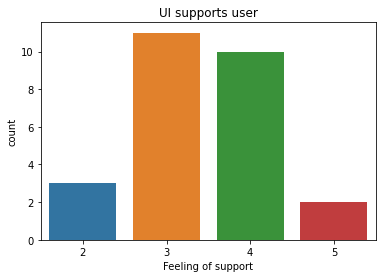

In [364]:
sns.countplot(x='The appearance of the question supports my decision. Het uiterlijk van de vraag helpt mij bij het maken van mijn keuzen.', data=df1)
plt.title('UI supports user')
plt.xlabel('Feeling of support')
plt.show()